In [2]:
from collections import Counter
import os
import pickle

cent19words = []
cent20words = []

def txt_to_counts(tfile):
    
    words = []
    with open(tfile, "r+") as f:
        f.readline()
        for line in f:
            info = line.split()
            words.append(info[1])
    counts = Counter(words)
    return counts



rootdir19 = '/Users/abigailamick/Desktop/CompSemanticsProject/text_files_centuries/19th_century'
century_counts = Counter()
cur_c = 0
past_year=0
years = []

for subdir in os.listdir(rootdir19):
    #yield subdir, dirs, files
    
    for file in os.listdir(rootdir19+"/"+subdir):     
        #print(file)
        #print(os.path.join(rootdir19+"/"+subdir+"/"+file))
        year = past_year
        curr_counts = txt_to_counts(os.path.join(rootdir19+"/"+subdir+"/"+file)) 
        year = file.split("_")
        year = year[1] 
        if past_year == year:
            cur_c += 1
        else:
            cur_c = 0
            past_year
        years.append(int(year)+(cur_c/100.0))
        century_counts["\'"+"_"+year+"_"+str(cur_c) ] =  curr_counts["\'"]
        
        
    


Counter({1822: 1160, 1884: 970, 1846: 933, 1855: 665, 1852: 610, 1896: 609, 1886: 585, 1827: 514, 1892: 427, 1873: 407, 1871: 406, 1834: 362, 1875: 331, 1861: 320, 1854: 300, 1888: 273, 1893: 253, 1870: 236, 1858: 205, 1845: 196, 1879: 188, 1853: 180, 1835: 171, 1897: 165, 1889: 147, 1838: 143, 1877: 105, 1868: 102, 1813: 99, 1874: 97, 1833: 92, 1824: 89, 1898: 86, 1818: 78, 1864: 72, 1860: 70, 1848: 62, 1899: 60, 1828: 56, 1817: 52, 1866: 50, 1821: 49, 1865: 48, 1847: 46, 1890: 45, 1843: 43, 1891: 39, 1815: 39, 1812: 36, 1842: 35, 1811: 34, 1894: 28, 1839: 27, 1895: 25, 1887: 25, 1826: 21, 1859: 21, 1823: 15, 1825: 15, 1832: 15, 1885: 11, 1880: 10, 1830: 9, 1810: 9, 1883: 9, 1841: 8, 1851: 8, 1862: 8, 1863: 8, 1869: 7, 1840: 6, 1836: 6, 1831: 5, 1814: 5, 1882: 5, 1850: 3, 1881: 3, 1856: 2, 1857: 2, 1819: 2, 1829: 1, 1872: 1, 1876: 1, 1849: 1, 1867: 1, 1820: 0, 1878: 0, 1844: 0, 1837: 0})


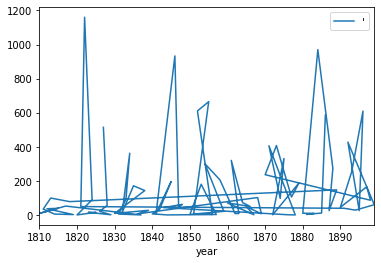

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
years = Counter()
past_year = 0
feature_count_df = pd.DataFrame([])
for yer in century_counts:
    year = yer.split("_")[1]
    #print(century_counts[yer])
    if year not in years:
        years[int(year)] = century_counts[yer] 
    else:
        years[int(year)] = years[int(year)]+ century_counts[yer] 
print(years)     
feature_count_df = pd.DataFrame(list(years.items()), columns = ["year","\'"] )
feature_count_df.set_index(["year","\'"])
feature_count_df["cent"] = ["19th" for num in range(len(feature_count_df.year))]

feature_count_df.to_csv("contraction_19.csv")


%matplotlib inline
plot = feature_count_df.plot( x = "year" , y = "\'" )

